In [1]:
from numpy import *
import operator
from os import listdir

In [2]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels
print(createDataSet())

(array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]]), ['A', 'A', 'B', 'B'])


In [3]:
group,labels = createDataSet()
print(group)
print(labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


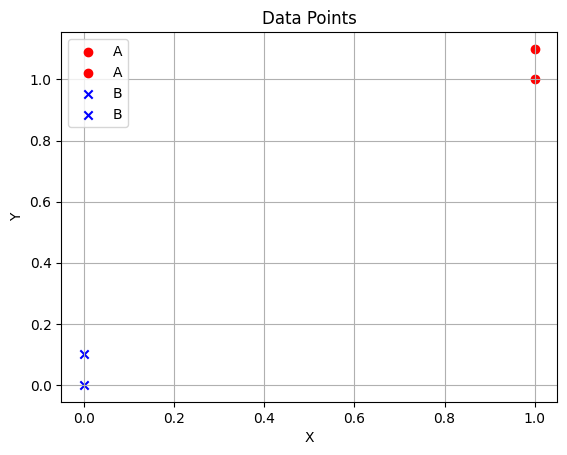

In [5]:
import matplotlib.pyplot as plt

for i, point in enumerate(group):
    if labels[i] == 'A':
        plt.scatter(point[0], point[1], color='red', marker='o', label='A')
    else:
        plt.scatter(point[0], point[1], color='blue', marker='x', label='B')

# Add legend and labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
def classify0(inX, dataSet, labels, k):
    print(dataSet.shape)
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    #print(tile(inX, (dataSetSize,1)))
    #print(dataSet)
    #print(diffMat)
    sqDiffMat = diffMat**2
    print("carre")
    #print(sqDiffMat)
    sqDistances = sqDiffMat.sum(axis=1)
    print("distance")
    #print(sqDistances)
    distances = sqDistances**0.5
    print("racine distance")
    #print(distances)
    sortedDistIndicies = distances.argsort()     
    #print(sortedDistIndicies)
    #print(distances)
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

classify0([0,0], group, labels, 3)

(4, 2)
carre
distance
racine distance


'B'

In [8]:
#Nombre de miles de fidélité gagnés par an
#Pourcentage du temps passé à jouer aux jeux vidéo
#Litres de crème glacée consommés par semaine

def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(listFromLine[-1])
        index += 1
    return returnMat,classLabelVector
inputMat,  = file2matrix("datingTestSet.txt")
print(inputMat[0 :5])
print(classLabelVector[0 :5])

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]]
['largeDoses', 'smallDoses', 'didntLike', 'didntLike', 'didntLike']


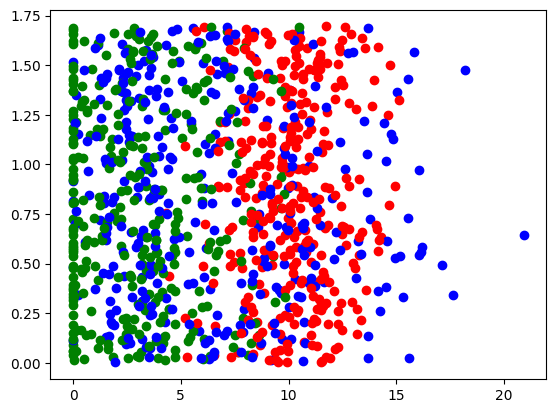

In [16]:
import matplotlib
import matplotlib.pyplot as plt
label_map = {"largeDoses" : 0, "smallDoses" : 1, "didntLike" : 2}
colors = ["red", "green", "blue"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, input in enumerate(inputMat):
    label = classLabelVector[i]
    index = label_map[label]
    color = colors[index]
    ax.scatter(input[1], input[2], color = color)
plt.show()

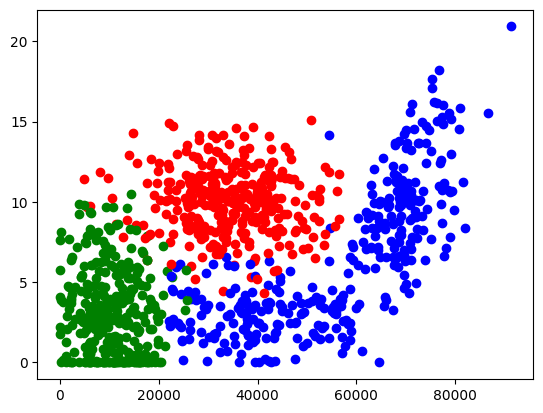

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, input in enumerate(inputMat):
    label = classLabelVector[i]
    index = label_map[label]
    color = colors[index]
    ax.scatter(input[0], input[1], color = color)
plt.show()

In [32]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    #print(minVals)
    maxVals = dataSet.max(0)
    #print(maxVals)
    ranges = maxVals - minVals
    #print(ranges)
    normDataSet = zeros(shape(dataSet))
    #print(normDataSet)
    m = dataSet.shape[0]
    #print(m)
    normDataSet = dataSet - tile(minVals, (m,1))
    #print(normDataSet[0:5])
    normDataSet = normDataSet/tile(ranges, (m,1))
    #print(normDataSet[0:5])
    return normDataSet, ranges, minVals

autoNorm(inputMat)

(array([[0.44832535, 0.39805139, 0.56233353],
        [0.15873259, 0.34195467, 0.98724416],
        [0.28542943, 0.06892523, 0.47449629],
        ...,
        [0.29115949, 0.50910294, 0.51079493],
        [0.52711097, 0.43665451, 0.4290048 ],
        [0.47940793, 0.3768091 , 0.78571804]]),
 array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00]),
 array([0.      , 0.      , 0.001156]))

In [37]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], 3)
        print(f"the classifier came back with: {classifierResult}, the real answer is: {datingLabels[i]}")
        if (classifierResult != datingLabels[i]): 
            errorCount += 1.0
    print(f"the total error rate is: {(errorCount/float(numTestVecs))}")
datingClassTest()

(900, 3)
carre
distance
racine distance
the classifier came back with: largeDoses, the real answer is: largeDoses
(900, 3)
carre
distance
racine distance
the classifier came back with: smallDoses, the real answer is: smallDoses
(900, 3)
carre
distance
racine distance
the classifier came back with: didntLike, the real answer is: didntLike
(900, 3)
carre
distance
racine distance
the classifier came back with: didntLike, the real answer is: didntLike
(900, 3)
carre
distance
racine distance
the classifier came back with: didntLike, the real answer is: didntLike
(900, 3)
carre
distance
racine distance
the classifier came back with: didntLike, the real answer is: didntLike
(900, 3)
carre
distance
racine distance
the classifier came back with: largeDoses, the real answer is: largeDoses
(900, 3)
carre
distance
racine distance
the classifier came back with: largeDoses, the real answer is: largeDoses
(900, 3)
carre
distance
racine distance
the classifier came back with: didntLike, the real answe